<a href="https://colab.research.google.com/github/xinformatics/DeepLearningLifeSciences/blob/master/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#chapter4
#This chapter covers the basics of performing machine learning on molecular data.

In [3]:
#setup deepchem
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
#import deepchem as dc

--2020-07-24 18:53:10--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M  79.0MB/s    in 6.3s    

2020-07-24 18:53:17 (80.0 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7

In [5]:
#checking extended connectivity fingrprint

In [6]:
import deepchem as dc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [7]:
dc.__version__

'2.3.0'

In [8]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [9]:
smiles = ['C1CCCCC1', 'O1CCOCC1'] # cyclohexane and dioxane

In [10]:
from rdkit import Chem

In [27]:
#Chem.Descriptors.descList

In [11]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [12]:
#mols[0]
feat = dc.feat.CircularFingerprint(size=1024)

In [13]:
arr = feat.featurize(mols)

In [14]:
arr.shape

(2, 1024)

In [15]:
"""
ECFPs do have one important disadvantage: the fingerprint encodes a large amount
of information about the molecule, but some information does get lost. It is possible
for two different molecules to have identical fingerprints, and given a fingerprint, it is
impossible to uniquely determine what molecule it came from.
"""

'\nECFPs do have one important disadvantage: the fingerprint encodes a large amount\nof information about the molecule, but some information does get lost. It is possible\nfor two different molecules to have identical fingerprints, and given a fingerprint, it is\nimpossible to uniquely determine what molecule it came from.\n'

In [16]:
#moleculae descriptors from physiochemical propeties
feat = dc.feat.RDKitDescriptors()

In [17]:
arr = feat.featurize(mols)

In [18]:
arr.shape

(2, 111)

In [19]:
#introducing graph convolutions

In [20]:
"""
That is what machine learning is all about, after all: instead of designing a featuriza‐
tion ourselves, we can try to learn one automatically from the data.

"""

'\nThat is what machine learning is all about, after all: instead of designing a featuriza‐\ntion ourselves, we can try to learn one automatically from the data.\n\n'

In [21]:
"""
When the graph
represents a molecule, those numbers could be high-level chemical properties of each
atom, such as its element, charge, and hybridization state. Just as a regular convolu‐/

"""

'\nWhen the graph\nrepresents a molecule, those numbers could be high-level chemical properties of each\natom, such as its element, charge, and hybridization state. Just as a regular convolu‐/\n\n'

In [22]:
#active

In [42]:
"""
Examples include graph convolutions ( GraphConvModel ), Weave models ( WeaveMo
del ), message passing neural networks ( MPNNModel ), deep tensor neural networks
( DTNNModel )

"""

'\nExamples include graph convolutions ( GraphConvModel ), Weave models ( WeaveMo\ndel ), message passing neural networks ( MPNNModel ), deep tensor neural networks\n( DTNNModel )\n\n'

In [23]:
#Training a Model to Predict Solubility

In [24]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/delaney-processed.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 3.709 s
TIMING: dataset construction took 4.081 s
Loading dataset from disk.
TIMING: dataset construction took 0.360 s
Loading dataset from disk.
TIMING: dataset construction took 0.314 s
Loading dataset from disk.
TIMING: dataset construction took 0.157 s
Loading dataset from disk.
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.041 s
Loading dataset from disk.
TIMING: dataset construction took 0.042 s
Loading dataset from disk.


In [25]:
train_dataset, valid_dataset, test_dataset = datasets

In [26]:
from deepchem.models.graph_models import GraphConvModel

In [27]:
model = GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [28]:
model.fit(train_dataset, nb_epoch=100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.0

In [29]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [30]:
print(model.evaluate(train_dataset, [metric], transformers))

computed_metrics: [0.9560543305748059]
{'pearson_r2_score': 0.9560543305748059}


In [31]:
print(model.evaluate(test_dataset, [metric], transformers))

computed_metrics: [0.8727389384317168]
{'pearson_r2_score': 0.8727389384317168}


In [32]:
#Training r2 = .956
#Test r2 = 0859 ~ .872
#overfitting but not badly

In [33]:
#now predicting solubilities on different chemical compunds

In [34]:
# as given by the book
# smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
# 'CCOC(=O)CC',
# 'CSc1nc(NC(C)C)nc(NC(C)C)n1',
# 'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
# 'Cc1cc2ccccc2cc1C']

In [35]:
# the following compounds (kinase inhibitors and covid-19 drug) were not in the tutorial or the book, 
# I searched them over the internet and found their SMILES code
# I chose them because of my interest
# for Kinase they are: Afatinib and Dacomitinib
# for covid-19 they are: Remdisivir and Favipiravir
#smiles = ['CN(C)C\C=C\C(=O)Nc3cc1c(Nc(cc2Cl)ccc2F)ncnc1cc3OC4COCC4','COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)NC(=O)/C=C/CN4CCCCC4']
smiles = ['CCC(COC(=O)[C@@H](NP(=O)(Oc1ccccc1)OC[C@H]1O[C@@]([C@@H]([C@@H]1O)O)(C#N)c1ccc2n1ncnc2N)C)CC','C1=C(N=C(C(=O)N1)C(=O)N)F']

In [36]:
mols = [Chem.MolFromSmiles(s) for s in smiles]

In [37]:
featurizer = dc.feat.ConvMolFeaturizer()

In [38]:
x = featurizer.featurize(mols)

In [39]:
x.shape

(2,)

In [40]:
predicted_solubility = model.predict_on_batch(x)

In [41]:
#predicted_solubility for kinase inhibitors
#predicted_solubility = model.predict_on_batch(x)
#Afatinib = [-0.8756279]
#Dacomitinib = [-1.2739315]

In [42]:
#predicted_solubility for covid drugs
#predicted_solubility = model.predict_on_batch(x)
#Remdisivir = [-0.79829633]
#Favipiravir = [ 0.6713617 ]

In [43]:
######################## done tutorial #########

In [45]:
#Extension to SMART format
#extension of the SMILES language described previously that can be used to create queries

In [46]:
from rdkit import Chem

In [47]:
#visualizing
from rdkit.Chem.Draw import MolsToGridImage

In [66]:
#smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]
smiles_list = ["CCCOCCC","CCOCOC","CCCNCC","CNCOCCOC"]

In [67]:
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

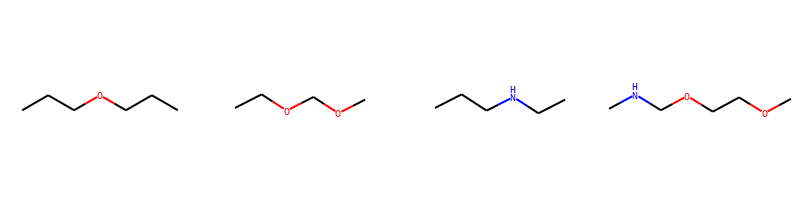

In [68]:
#Chem.Draw.MolToImage(mol_list[0])
MolsToGridImage(mols=mol_list, molsPerRow=4)

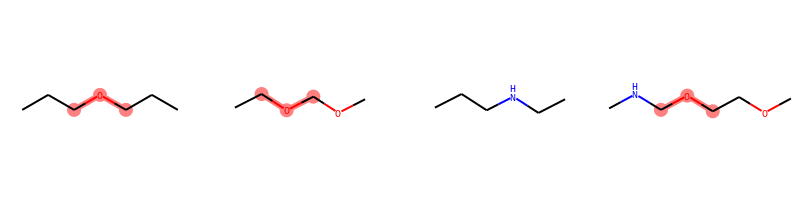

In [71]:
#now query 
query = Chem.MolFromSmarts("COC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)
#this is cool

In [72]:
#other queries can be 
# "C*C" will match an aliphatic carbon attached to any atom 
# attached to another aliphatic carbon 

# “C[C,O,N]C” will match carbon attached to carbon, oxygen, or
# nitrogen, attached to another carbon

In [73]:
"""
learned about graph convolutions, which are
a newer approach to modeling molecules in deep learning, and saw a complete work‐
ing example of how to use machine learning on molecules to predict an important
physical property. These techniques will serve as the foundations upon which later
chapters will build.

"""

'\nlearned about graph convolutions, which are\na newer approach to modeling molecules in deep learning, and saw a complete work‐\ning example of how to use machine learning on molecules to predict an important\nphysical property. These techniques will serve as the foundations upon which later\nchapters will build.\n\n'

In [74]:
#chapter 4 over